**ИТОГОВЫЙ ПРОЕКТ**

**1. Описание набора данных** 

Данные представляют собой выборку из системы СПАРК (ИНТЕРФАКС): https://spark-interfax.ru/features

Для целей данного проекта используется выборка компаний из сегментов среднего, крупного и крупнейшего бизнеса с выручкой по данным 2021 г от 400 млн руб до 100 млрд руб.

**Перечень показателей:**

1. Регистрационный номер: ОГРН (уникальный показатель)

2. Возраст компании: число лет с даты регистрации юридического лица

3. Статус: 4 категории (Действующая, Реорганизуется, В состоянии банкротства, Ликвидируется)

4. ИДО: Индекс Должной Осмотрительности * (показатель, рассчитанный СПАРК) представляет собой значение от 1 до 99, где более высокое значение отражает большую вероятность того, что компания создана не для уставных целей, а в качестве "транзакционной единицы", не имеющей существенных собственных активов и операций, или является "брошенным" активом.

5. ИФР  / Целевой признак, отклик: Индекс Финансового Риска * (показатель, рассчитанный СПАРК) - представляет собой значение от 1 до 99, где более высокое значение указывает на наличие признаков неудовлетворительного финансового состояния, которые могут привести к тому, что компания утратит платежеспособность.


> 1 - 30 - низкий риск

> 31 - 70 - средний риск

> 71 - 99 - высокий риск


6. ИПД: Индекс Платежной Дисциплины (показатель, рассчитанный СПАРК) * (Paydex) представляет собой значение от 0 до 100, где более низкое значение указывает на высокий риск просрочки платежей. Индекс платежной дисциплины рассчитывается автоматически на основании данных по платежам компании, полученным от участников программы «Мониторинг платежей», что не может гарантировать покрытия всех платежей компании.

**Значение индекса является скоринговым аналитическим показателем, рассчитываемым на основании публично доступной информации о деятельности юридического лица. За достоверность указанной информации Интерфакс ответственности не несет. Значение индекса может быть автоматически изменено при получении новой и/или дополнительной информации. Данная оценка является мнением Интерфакс и не дает каких-либо гарантий или заверений третьим лицам, а также не является рекомендацией для покупки, владения или продажи ценных бумаг, принятия (или непринятия) каких-либо коммерческих или иных решений.*

7. Сумма незавершенных исков в роли ответчика: сумма в руб

8. Важная информация: обнаруженные негативные факторы (действующие решения ФНС о приостановлении операций по счетам; в отношении юридического лица в деле о несостоятельности (банкротстве) введено наблюдение; сообщение кредитора о намерении обратиться в суд с заявлением о банкротстве и пр.).

9. Показатели по данным бухгалтерского баланса и отчета о финансовых результатах компаний (в млн руб):
- 2021, Собственный капитал, млн RUB
- 2021, Совокупный долг, млн RUB
- 2021, Выручка, млн RUB  

10. Коэффициенты финансовой устойчивости, рентабельности и пр (рассчитаны СПАРК по формулам, указанным ниже; "стр" - строки бух. баланса и отчета о финансовых результатах):
- 2021, Коэффициент соотношения заемных и собственных средств, %: 
(стр. 1400 + стр. 1500)/(стр. 1300 + стр. 1530)*100
- 2021, Коэффициент покрытия процентов по EBIT, %: (стр.2300 + стр.2330 - стр.2320 - стр.2310)/ стр. 2330*100
- 2021, Соотношение совокупного долга к EBIT, %: (стр.1410+стр.1510)/( стр.2300 + стр.2330 - стр.2320 - стр.2310)*100
- 2021, Коэффициент концентрации собственного капитала (автономии), %: (стр. 1300 + стр. 1530) / стр. 1700*100
- 2021, Коэффициент маневренности собственных средств, %: (стр. 1300 - стр. 1100)/(стр. 1300 + стр. 1530)*100
- 2021, Коэффициент обеспеченности собственными оборотными средствами, %: 
(стр. 1300 + стр. 1530 - стр. 1100)/стр. 1200 * 100
- 2021, Чистая норма прибыли, %: стр. 2400 / стр. 2110 * 100
- 2021, Валовая рентабельность, %: стр. 2100/стр.2110*100
- 2021, Рентабельность продаж, %: стр. 2200 / стр. 2110 * 100 (для упрощенной формы (стр.2110 - стр. 2120) / стр. 2110 * 100)
- 2021, Коэффициент текущей ликвидности, %: стр. 1200/стр.1500*100


Задача - предсказать уровень финансового риска компании (ИФР): 1 - низкий риск, 2 - средний риск, 3 - высокий риск (задача классификации). Решение этой задачи может быть, например, полезно для банка с целью оценки финансового состояния компаний и принятия решений о предоставлении банковских продуктов (кредиты, документарные продукты и прочее).

**2. Загрузка и предварительная обработка данных**

In [49]:
# Импортируем библиотеки
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
# Загружаем данные в датафреймы. Особенностью СПАРК является максимальная выгрузка данных не более чем по 10 тыс компаниям, поэтому файлов с данными несколько.
raw_data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (1500-3200 mRUB).xlsx')
raw_data2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (3250-16000 mRUB).xlsx')
raw_data3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (950-1450 mRUB).xlsx')
raw_data4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (700-940 mRUB).xlsx')
raw_data5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (530-690 mRUB).xlsx')
raw_data6 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (400-520 mRUB).xlsx')
raw_data7 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (16050-100000 mRUB).xlsx')
raw_data8 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Финальный проект/!!!/data (300-395 mRUB).xlsx')

In [51]:
# Объединяем все полученные датафреймы в один датафрейм.
raw_data = pd.concat([raw_data1, raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7, raw_data8], ignore_index=True)
raw_data

,№,Регистрационный номер,"Возраст компании, лет",Статус,ИДО,ИФР,ИПД,"Сумма незавершенных исков в роли ответчика, RUB",Важная информация,"2021, Собственный капитал, млн RUB",...,"2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Валовая рентабельность, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %"
0,1,1167746818689,6.0,Действующая,8.0,20.0,NaN,NaN,0,31.0,...,15.0931,6.6050,2.6249,0.0621,1.0000,0.0621,0.0059,0.0136,0.0136,1.1627
1,2,1027739039624,26.5,Действующая,1.0,65.0,NaN,NaN,0,627.0,...,4.9775,0.0923,184.8139,0.1707,-0.1879,-0.0141,-0.0471,0.2185,0.1312,1.1768
2,3,1157329003480,6.5,Действующая,1.0,9.0,NaN,NaN,0,641.0,...,0.6213,44.8477,0.3938,0.6168,0.9598,0.6071,0.1932,0.2247,0.2023,6.2759
3,4,1137746797363,9.0,Действующая,45.0,38.0,NaN,390000.0,0,41.0,...,5.2759,56.1436,NaN,0.1593,0.9520,0.1529,0.0045,0.2977,-0.0039,1.1805
4,5,5077746476209,15.5,Действующая,1.0,5.0,NaN,NaN,0,428.0,...,0.2184,NaN,NaN,0.8208,0.9598,0.8147,0.3817,0.7550,0.4827,5.4356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59055,9984,1075752006330,14.5,Действующая,2.0,34.0,NaN,NaN,0,20.0,...,7.6481,NaN,NaN,0.1156,-0.0373,-0.0049,0.0244,NaN,0.0257,0.9951
59056,9988,5177746390685,4.5,Действующая,51.0,89.0,NaN,NaN,0,15.0,...,34.3384,NaN,-10.7159,0.0283,1.0000,0.0283,-0.0186,0.2193,-0.0296,1.1765
59057,9990,1207700094040,2.5,Действующая,15.0,56.0,NaN,NaN,0,1.0,...,9.0902,1.1705,3.8411,0.0991,1.0000,0.0991,NaN,0.0933,0.0038,1.1511
59058,9992,1127746417567,10.5,Действующая,6.0,95.0,NaN,9324370.0,0,-75.0,...,-2.5599,-116.3946,-0.1775,-0.6411,1.1322,-0.7930,-0.1098,0.1991,-0.0354,0.5669


In [52]:
# Обратим внимание на размеры полученного датафрейма: число строк - 59060 (кол-во компаний), число столбцов - 22 (кол-во показателей).
raw_data.shape

(59060, 22)

In [53]:
# Удаляем показатели "Регистрационный номер" и "№", т.к. они являются уникальными для каждой компании и никак не влияют на финансовое состояние.
df = raw_data.drop(['Регистрационный номер', '№'], axis=1)
df.head()

,"Возраст компании, лет",Статус,ИДО,ИФР,ИПД,"Сумма незавершенных исков в роли ответчика, RUB",Важная информация,"2021, Собственный капитал, млн RUB","2021, Совокупный долг, млн RUB","2021, Выручка, млн RUB","2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Валовая рентабельность, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %"
0,6.0,Действующая,8.0,20.0,NaN,NaN,0,31.0,463.0,1805,15.0931,6.6050,2.6249,0.0621,1.0000,0.0621,0.0059,0.0136,0.0136,1.1627
1,26.5,Действующая,1.0,65.0,NaN,NaN,0,627.0,3120.0,2824,4.9775,0.0923,184.8139,0.1707,-0.1879,-0.0141,-0.0471,0.2185,0.1312,1.1768
2,6.5,Действующая,1.0,9.0,NaN,NaN,0,641.0,398.0,3015,0.6213,44.8477,0.3938,0.6168,0.9598,0.6071,0.1932,0.2247,0.2023,6.2759
3,9.0,Действующая,45.0,38.0,NaN,390000.0,0,41.0,215.0,2546,5.2759,56.1436,NaN,0.1593,0.9520,0.1529,0.0045,0.2977,-0.0039,1.1805
4,15.5,Действующая,1.0,5.0,NaN,NaN,0,428.0,93.0,2495,0.2184,NaN,NaN,0.8208,0.9598,0.8147,0.3817,0.7550,0.4827,5.4356


In [54]:
# Проверяем общее количество пропущенных значений.
df.isnull().sum()

Возраст компании, лет                                                         0
Статус                                                                        0
ИДО                                                                         347
ИФР                                                                         950
ИПД                                                                       47026
Сумма незавершенных исков в роли ответчика, RUB                           45381
Важная информация                                                             0
2021, Собственный капитал, млн RUB                                          171
2021, Совокупный долг, млн RUB                                              386
2021, Выручка, млн RUB                                                        0
2021, Коэффициент соотношения заемных и собственных средств, %              445
2021, Коэффициент покрытия процентов по EBIT, %                           25382
2021, Соотношение совокупного долга к EB

In [55]:
# Пропущенные значения в показателе "Сумма незавершенных исков в роли ответчика, RUB" означают, что иски отсутствуют (= 0).
df['Сумма незавершенных исков в роли ответчика, RUB'] = df['Сумма незавершенных исков в роли ответчика, RUB'].fillna(0)

In [56]:
# Удаляем из данных строки, в которых есть пропущенные значения.
clean_df = df.dropna(subset = ['ИФР', 'ИПД','2021, Коэффициент покрытия процентов по EBIT, %', '2021, Соотношение совокупного долга к EBIT, %','2021, Коэффициент концентрации собственного капитала (автономии), %', '2021, Чистая норма прибыли, %', '2021, Коэффициент обеспеченности собственными оборотными средствами, %', '2021, Коэффициент маневренности собственных средств, %','2021, Валовая рентабельность, %', '2021, Рентабельность продаж, %', '2021, Коэффициент текущей ликвидности, %'])

In [57]:
# Проверяем оставшееся количество пропущенных значений.
clean_df.isna().sum()

Возраст компании, лет                                                     0
Статус                                                                    0
ИДО                                                                       0
ИФР                                                                       0
ИПД                                                                       0
Сумма незавершенных исков в роли ответчика, RUB                           0
Важная информация                                                         0
2021, Собственный капитал, млн RUB                                        0
2021, Совокупный долг, млн RUB                                            0
2021, Выручка, млн RUB                                                    0
2021, Коэффициент соотношения заемных и собственных средств, %            0
2021, Коэффициент покрытия процентов по EBIT, %                           0
2021, Соотношение совокупного долга к EBIT, %                             0
2021, Коэффи

In [58]:
# Обратим внимание на размеры полученного датафрейма
clean_df.shape

(6987, 20)

In [59]:
# Разбиваем отклик (показатель "ИФР") на 3 класса в соответствии с уровнем финансового риска (1 - низкий риск, 2 - средний риск, 3 - высокий риск).
clean_df.loc[(clean_df.ИФР < 31), 'ИФР'] = 1
clean_df.loc[(clean_df.ИФР > 30) & (clean_df.ИФР < 71), 'ИФР'] = 2
clean_df.loc[(clean_df.ИФР > 70), 'ИФР'] = 3
clean_df['ИФР'].value_counts()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1.0    5651
2.0    1140
3.0     196
Name: ИФР, dtype: int64

In [60]:
# В данных имеется 1 категориальный показатель - "Статус". Преобразуем его в числа.
clean_df['Статус'].replace(['Действующая', 'Реорганизуется', 'В состоянии банкротства', 'Ликвидируется'], [0, 1, 2, 3], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


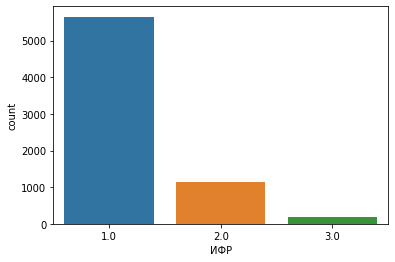

In [61]:
# Изобразим распределение отклика по классам. Таким образом, в данных преобладающая часть компаний относится к классу 1 (низкий уровень финансового риска).
sns.countplot('ИФР', data=clean_df)
plt.show()

In [62]:
# Показатель "Сумма незавершенных исков в роли ответчика" отражен в рублях, приведем его в млн руб в соответствии с остальными рублевыми показателями в данных.
clean_df['Сумма незавершенных исков в роли ответчика, RUB'] = clean_df['Сумма незавершенных исков в роли ответчика, RUB'] / 1000000
clean_df.rename(columns = {'Сумма незавершенных исков в роли ответчика, RUB' : 'Сумма незавершенных исков в роли ответчика, млн RUB'}, inplace = True) 

<ipython-input-62-90773bb4bc27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Сумма незавершенных исков в роли ответчика, RUB'] = clean_df['Сумма незавершенных исков в роли ответчика, RUB'] / 1000000
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


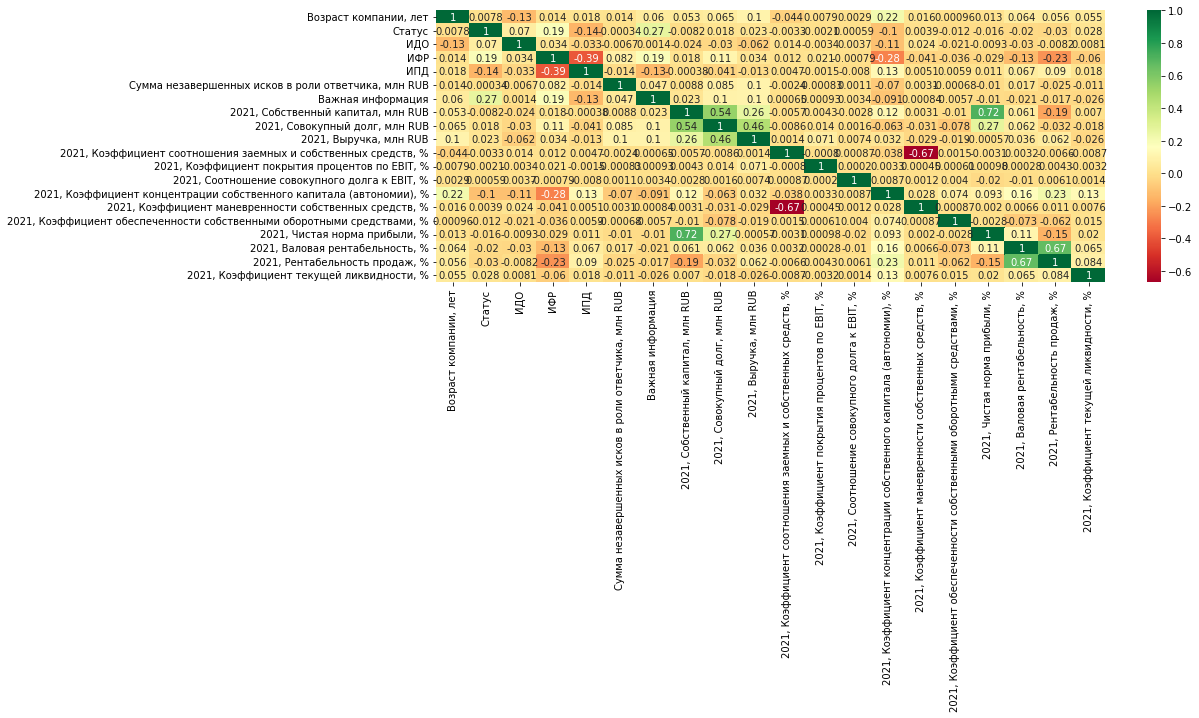

In [63]:
# Посмотрим на матрицу корреляций
sns.heatmap(clean_df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [64]:
# Показатель "Валовая рентабельность" сильно коррелирует с показателем "Рентабельность продаж", поэтому удалим его из датафрейма.
clean_df = clean_df.drop(['2021, Валовая рентабельность, %'], axis=1)
clean_df.head()

,"Возраст компании, лет",Статус,ИДО,ИФР,ИПД,"Сумма незавершенных исков в роли ответчика, млн RUB",Важная информация,"2021, Собственный капитал, млн RUB","2021, Совокупный долг, млн RUB","2021, Выручка, млн RUB","2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %"
11,10.0,0,3.0,1.0,98.0,2.365209,0,176.0,1585.0,2265,9.0254,1.8593,3.5494,0.0997,0.9710,0.0971,0.0323,0.0671,1.1076
28,8.0,0,2.0,2.0,45.0,0.000000,0,1.0,1239.0,2449,1284.7770,1.2301,16.0504,0.0008,-73.0612,-0.0603,0.0005,-0.0042,0.9435
33,8.0,0,13.0,1.0,99.0,0.110915,0,1874.0,4699.0,2288,2.5080,8.9181,0.6750,0.3955,0.0060,0.3921,0.0060,0.0349,1.0051
49,8.0,0,1.0,1.0,90.0,0.130000,0,264.0,544.0,2173,2.0638,14.9863,0.3366,0.3264,-0.3243,-0.1864,0.0712,0.1127,1.0944
51,10.0,0,2.0,2.0,80.0,41.411213,0,317.0,3226.0,2671,10.1824,8.1978,0.4488,0.0894,-2.9649,-0.4108,0.0284,0.0080,0.7194


In [65]:
clean_df.rename(columns = {'Статус' : 'Status'}, inplace = True) 
# Разделим признак "Status" на 2 категории: значениям 'Реорганизуется', 'В состоянии банкротства', 'Ликвидируется' присвоим значение 2.
clean_df.loc[(clean_df.Status  >= 2), 'Status'] = 2

In [66]:
clean_df.rename(columns = {'ИФР' : 'IFR'}, inplace = True)

**3. Генерация новых признаков, обработка данных**

In [67]:
clean_df.rename(columns = {'Сумма незавершенных исков в роли ответчика, млн RUB' : 'Claims'}, inplace = True) 
clean_df.rename(columns = {'2021, Собственный капитал, млн RUB' : 'Equity'}, inplace = True) 
# Рассчитаем соотношение суммы незавершенных исков в роли ответчика на последнюю актуальную дату и собственного капитала на 31.12.21 г (% от собственного капитала)
clean_df['Litigations'] = 0
clean_df['Litigations'] = clean_df['Claims'] / clean_df['Equity'] * 100

In [68]:
# Разделим признак "Litigations" на несколько категорий
clean_df.loc[((clean_df.Litigations  > 0) & (clean_df.Litigations  <= 10)) | (clean_df.Claims == 0), 'Litigations'] = 1 
clean_df.loc[(clean_df.Litigations  > 10) & (clean_df.Litigations  <= 25), 'Litigations'] = 2
clean_df.loc[(clean_df.Litigations  > 25) & (clean_df.Litigations  <= 50), 'Litigations'] = 3
clean_df.loc[(clean_df.Litigations  > 50) & (clean_df.Litigations  < 100), 'Litigations'] = 4
clean_df.loc[(clean_df.Litigations  >= 100) | (clean_df.Litigations  < 0) | (clean_df.Equity == 0), 'Litigations'] = 0 

In [69]:
# Удаляем ненужные столбцы
clean_df = clean_df.drop(['Claims', 'Equity', '2021, Совокупный долг, млн RUB', '2021, Выручка, млн RUB'], axis=1)
clean_df.head()

,"Возраст компании, лет",Status,ИДО,IFR,ИПД,Важная информация,"2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %",Litigations
11,10.0,0,3.0,1.0,98.0,0,9.0254,1.8593,3.5494,0.0997,0.9710,0.0971,0.0323,0.0671,1.1076,1.0
28,8.0,0,2.0,2.0,45.0,0,1284.7770,1.2301,16.0504,0.0008,-73.0612,-0.0603,0.0005,-0.0042,0.9435,1.0
33,8.0,0,13.0,1.0,99.0,0,2.5080,8.9181,0.6750,0.3955,0.0060,0.3921,0.0060,0.0349,1.0051,1.0
49,8.0,0,1.0,1.0,90.0,0,2.0638,14.9863,0.3366,0.3264,-0.3243,-0.1864,0.0712,0.1127,1.0944,1.0
51,10.0,0,2.0,2.0,80.0,0,10.1824,8.1978,0.4488,0.0894,-2.9649,-0.4108,0.0284,0.0080,0.7194,2.0


In [70]:
# Исследуем данные при значении ИФР = 1
class1 = clean_df.loc[clean_df.IFR == 1]
class1.describe()

,"Возраст компании, лет",Status,ИДО,IFR,ИПД,Важная информация,"2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %",Litigations
count,5651.000000,5651.000000,5651.000000,5651.0,5651.000000,5651.000000,5651.000000,5.651000e+03,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000,5651.000000
mean,17.066006,0.010441,2.143868,1.0,89.364360,0.125818,11.764609,6.884139e+02,-2.923852,0.344174,-0.589630,-0.551334,0.085943,0.104077,2.337518,1.051849
std,7.836576,0.106749,5.156009,0.0,15.275145,0.331674,199.091040,1.809826e+04,462.544211,0.266974,19.147943,19.765338,0.381012,0.132644,6.123973,0.395508
min,0.500000,0.000000,1.000000,1.0,0.000000,0.000000,-1103.702100,-1.095922e+03,-34435.066700,-3.111400,-781.906500,-1471.349000,-4.822900,-1.733500,0.012300,0.000000
25%,11.000000,0.000000,1.000000,1.0,84.000000,0.000000,0.832650,2.743250e+00,0.596500,0.158150,-0.214100,-0.110250,0.013400,0.026900,1.131350,1.000000
50%,16.500000,0.000000,1.000000,1.0,95.000000,0.000000,1.997400,8.101400e+00,1.955600,0.317500,0.393300,0.107800,0.039200,0.063300,1.511800,1.000000
75%,23.000000,0.000000,1.000000,1.0,100.000000,0.000000,4.780900,2.873585e+01,5.213100,0.524000,0.781650,0.330700,0.095200,0.136100,2.305350,1.000000
max,64.000000,2.000000,93.000000,1.0,100.000000,1.000000,10435.779800,1.013660e+06,2408.206800,0.988400,464.163700,0.976400,23.600800,1.914900,369.432900,4.000000


In [71]:
# Исследуем данные при значении ИФР = 2
class2 = clean_df.loc[clean_df.IFR == 2]
class2.describe()

,"Возраст компании, лет",Status,ИДО,IFR,ИПД,Важная информация,"2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %",Litigations
count,1140.000000,1140.000000,1140.000000,1140.0,1140.000000,1140.000000,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,17.007018,0.024561,2.512281,2.0,79.307018,0.246491,20.877139,1.094092e+04,-1.129954,0.154107,-8.675079,-2.084103,0.077202,0.016467,1.247083,1.099123
std,8.093421,0.171017,6.693649,0.0,24.163704,0.431157,447.984328,3.171691e+05,216.612238,0.417235,147.704707,7.701419,2.370766,0.278878,1.977004,0.741234
min,1.500000,0.000000,1.000000,2.0,0.000000,0.000000,-5714.409300,-2.400500e+03,-6981.851900,-4.791300,-3417.894700,-115.256700,-3.402200,-4.956000,0.029800,0.000000
25%,10.000000,0.000000,1.000000,2.0,73.000000,0.000000,0.602300,-1.059575e+00,-0.967925,0.024175,-2.207475,-1.455875,-0.038450,-0.024325,0.707000,1.000000
50%,16.500000,0.000000,1.000000,2.0,87.000000,0.000000,2.806750,1.467600e+00,2.534950,0.143550,-0.402100,-0.344900,0.005200,0.023050,0.966600,1.000000
75%,23.500000,0.000000,1.000000,2.0,97.000000,0.000000,9.156600,5.089675e+00,9.001200,0.352825,0.552450,-0.012275,0.039925,0.075250,1.254325,1.000000
max,33.500000,2.000000,86.000000,2.0,100.000000,1.000000,12677.245600,1.054150e+07,866.129400,0.972100,1240.531600,0.961300,77.123000,0.835300,40.742200,4.000000


In [72]:
# Исследуем данные при значении ИФР = 3
class3 = clean_df.loc[clean_df.IFR == 3]
class3.describe()

,"Возраст компании, лет",Status,ИДО,IFR,ИПД,Важная информация,"2021, Коэффициент соотношения заемных и собственных средств, %","2021, Коэффициент покрытия процентов по EBIT, %","2021, Соотношение совокупного долга к EBIT, %","2021, Коэффициент концентрации собственного капитала (автономии), %","2021, Коэффициент маневренности собственных средств, %","2021, Коэффициент обеспеченности собственными оборотными средствами, %","2021, Чистая норма прибыли, %","2021, Рентабельность продаж, %","2021, Коэффициент текущей ликвидности, %",Litigations
count,196.000000,196.000000,196.000000,196.0,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,18.272959,0.290816,3.000000,3.0,42.811224,0.459184,18.710258,-120.823416,-10.716615,-0.081743,-4.068156,-2.910951,-0.171135,-0.083572,1.704939,1.086735
std,8.407612,0.703192,7.679476,0.0,29.064563,0.499607,136.669296,934.380996,95.341919,0.899377,29.362386,9.122377,0.688886,0.444690,12.155916,1.031617
min,3.500000,0.000000,1.000000,3.0,0.000000,0.000000,-63.175700,-10649.357100,-1108.458600,-7.593500,-380.640900,-94.617200,-5.939800,-3.980200,0.017800,0.000000
25%,11.000000,0.000000,1.000000,3.0,15.000000,0.000000,-2.825875,-9.704050,-4.687525,-0.116050,-1.999775,-1.984850,-0.135525,-0.122100,0.525100,0.000000
50%,17.750000,0.000000,1.000000,3.0,44.000000,0.000000,2.125800,-0.797350,-0.455200,0.050850,-0.096750,-0.592000,-0.023650,-0.013900,0.797250,1.000000
75%,27.125000,0.000000,2.000000,3.0,66.250000,1.000000,7.671525,1.735075,4.660825,0.239000,1.367025,-0.121825,0.010250,0.032275,1.004350,1.000000
max,31.500000,2.000000,72.000000,3.0,100.000000,1.000000,1823.512700,1997.267600,452.830000,0.889400,20.127100,0.605900,3.125300,0.616200,170.856600,4.000000


In [73]:
# Разбиваем показатель "ИПД" на 3 класса 
clean_df.loc[(clean_df.ИПД <= 49), 'ИПД'] = 3
clean_df.loc[(clean_df.ИПД >= 50) & (clean_df.ИПД <= 79), 'ИПД'] = 2
clean_df.loc[(clean_df.ИПД > 79), 'ИПД'] = 1
clean_df['ИПД'].value_counts()

1.0    5581
2.0     977
3.0     429
Name: ИПД, dtype: int64

In [74]:
# Разбиваем показатель "ИДО" на 3 класса
clean_df.loc[(clean_df.ИДО < 41), 'ИДО'] = 1
clean_df.loc[(clean_df.ИДО > 40) & (clean_df.ИДО < 71), 'ИДО'] = 2
clean_df.loc[(clean_df.ИДО > 70), 'ИДО'] = 3
clean_df['ИДО'].value_counts()

1.0    6951
2.0      28
3.0       8
Name: ИДО, dtype: int64

In [75]:
clean_df.rename(columns = {'2021, Коэффициент соотношения заемных и собственных средств, %' : 'Gearing'}, inplace = True) 
# Разделим признак "Gearing" на несколько категорий
clean_df.loc[(clean_df.Gearing  <= 100), 'Gearing'] = 0 
clean_df.loc[(clean_df.Gearing  > 100), 'Gearing'] = 1

In [76]:
clean_df.rename(columns = {'2021, Коэффициент покрытия процентов по EBIT, %' : 'ICR'}, inplace = True) 
# Разделим признак "ICR" на несколько категорий
clean_df.loc[(clean_df.ICR >= 0) & (clean_df.ICR < 300), 'ICR'] = 1
clean_df.loc[(clean_df.ICR >= 300), 'ICR'] = 2
clean_df.loc[(clean_df.ICR < 0), 'ICR'] = 0
clean_df['ICR'].value_counts()

1.0    6035
0.0     634
2.0     318
Name: ICR, dtype: int64

In [77]:
clean_df.rename(columns = {'2021, Соотношение совокупного долга к EBIT, %' : 'Financial_debt_to_EBIT'}, inplace = True) 
# Разделим признак "Financial_debt_to_EBIT" на несколько категорий
clean_df.loc[(clean_df.Financial_debt_to_EBIT  < 0) , 'Financial_debt_to_EBIT'] = 0 
clean_df.loc[(clean_df.Financial_debt_to_EBIT  >= 0) & (clean_df.Financial_debt_to_EBIT  < 150), 'Financial_debt_to_EBIT'] = 1
clean_df.loc[(clean_df.Financial_debt_to_EBIT  >= 150) & (clean_df.Financial_debt_to_EBIT  < 300), 'Financial_debt_to_EBIT'] = 2
clean_df.loc[(clean_df.Financial_debt_to_EBIT  >= 300) & (clean_df.Financial_debt_to_EBIT  < 450), 'Financial_debt_to_EBIT'] = 3
clean_df.loc[(clean_df.Financial_debt_to_EBIT  >= 450) & (clean_df.Financial_debt_to_EBIT  < 600), 'Financial_debt_to_EBIT'] = 4
clean_df.loc[(clean_df.Financial_debt_to_EBIT  >= 600) , 'Financial_debt_to_EBIT'] = 5

In [78]:
clean_df.rename(columns = {'2021, Коэффициент концентрации собственного капитала (автономии), %' : 'Equity_ratio'}, inplace = True) 
# Разделим признак "Equity_ratio" на несколько категорий
clean_df.loc[(clean_df.Equity_ratio  <= 0) , 'Equity_ratio'] = 0 
clean_df.loc[(clean_df.Equity_ratio  > 0) & (clean_df.Equity_ratio  <= 15), 'Equity_ratio'] = 1 
clean_df.loc[(clean_df.Equity_ratio  > 15) & (clean_df.Equity_ratio  <= 25), 'Equity_ratio'] = 2 
clean_df.loc[(clean_df.Equity_ratio  > 25) & (clean_df.Equity_ratio  < 50), 'Equity_ratio'] = 3
clean_df.loc[(clean_df.Equity_ratio  >= 50) , 'Equity_ratio'] = 4

In [79]:
clean_df.rename(columns = {'2021, Коэффициент маневренности собственных средств, %' : 'CA_to_ER'}, inplace = True) 
# Разделим признак "CA_to_ER" на несколько категорий
clean_df.loc[(clean_df.CA_to_ER  > 0), 'CA_to_ER'] = 1
clean_df.loc[(clean_df.CA_to_ER  <= 0), 'CA_to_ER'] = 0

In [80]:
clean_df.rename(columns = {'2021, Коэффициент обеспеченности собственными оборотными средствами, %' : 'WC_to_CA_ratio'}, inplace = True) 
# Разделим признак "WC_to_CA_ratio" на несколько категорий
clean_df.loc[(clean_df.WC_to_CA_ratio  > 100) , 'WC_to_CA_ratio'] = 4
clean_df.loc[(clean_df.WC_to_CA_ratio  > 80) & (clean_df.WC_to_CA_ratio  <= 100), 'WC_to_CA_ratio'] = 3
clean_df.loc[(clean_df.WC_to_CA_ratio  >= 60) & (clean_df.WC_to_CA_ratio  <= 80), 'WC_to_CA_ratio'] = 2
clean_df.loc[(clean_df.WC_to_CA_ratio  >= 0) & (clean_df.WC_to_CA_ratio  < 60), 'WC_to_CA_ratio'] = 1
clean_df.loc[(clean_df.WC_to_CA_ratio  < 0) , 'WC_to_CA_ratio'] = 0 

In [81]:
clean_df.rename(columns = {'2021, Чистая норма прибыли, %' : 'NPM'}, inplace = True) 
# Разделим признак "NPM" на несколько категорий
clean_df.loc[(clean_df.NPM  <= 0), 'NPM'] = 0
clean_df.loc[(clean_df.NPM  > 0) & (clean_df.NPM  <= 10), 'NPM'] = 1
clean_df.loc[(clean_df.NPM  > 50), 'NPM'] = 2
clean_df.loc[(clean_df.NPM  > 25), 'NPM'] = 3
clean_df.loc[(clean_df.NPM  > 10), 'NPM'] = 4

In [82]:
clean_df.rename(columns = {'2021, Рентабельность продаж, %' : 'EBITm'}, inplace = True) 
# Разделим признак "EBITm" на несколько категорий
clean_df.loc[(clean_df.EBITm  <= 0), 'EBITm'] = 0
clean_df.loc[(clean_df.EBITm  > 0) & (clean_df.EBITm  <= 10), 'EBITm'] = 1
clean_df.loc[(clean_df.EBITm  > 50), 'EBITm'] = 2
clean_df.loc[(clean_df.EBITm  > 25), 'EBITm'] = 3
clean_df.loc[(clean_df.EBITm  > 10), 'EBITm'] = 4

In [83]:
clean_df.rename(columns = {'2021, Коэффициент текущей ликвидности, %' : 'Current_ratio'}, inplace = True) 
# Разделим признак "Current_ratio" на несколько категорий
clean_df.loc[(clean_df.Current_ratio < 100), 'Current_ratio'] = 0
clean_df.loc[(clean_df.Current_ratio >= 100) & (clean_df.Current_ratio < 200), 'Current_ratio'] = 1
clean_df.loc[(clean_df.Current_ratio >= 200), 'Current_ratio'] = 2
clean_df['Current_ratio'].value_counts()

0.0    6984
1.0       2
2.0       1
Name: Current_ratio, dtype: int64

In [84]:
clean_df.head()

,"Возраст компании, лет",Status,ИДО,IFR,ИПД,Важная информация,Gearing,ICR,Financial_debt_to_EBIT,Equity_ratio,CA_to_ER,WC_to_CA_ratio,NPM,EBITm,Current_ratio,Litigations
11,10.0,0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
28,8.0,0,1.0,2.0,3.0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
33,8.0,0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
49,8.0,0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
51,10.0,0,1.0,2.0,1.0,0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


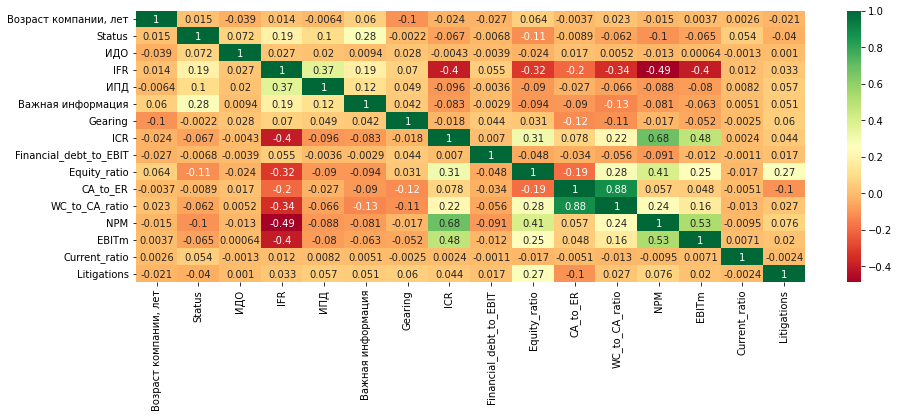

In [85]:
# Посмотрим на матрицу корреляций
sns.heatmap(clean_df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [86]:
clean_df.isna().sum()

Возраст компании, лет     0
Status                    0
ИДО                       0
IFR                       0
ИПД                       0
Важная информация         0
Gearing                   0
ICR                       0
Financial_debt_to_EBIT    0
Equity_ratio              0
CA_to_ER                  0
WC_to_CA_ratio            0
NPM                       0
EBITm                     0
Current_ratio             0
Litigations               0
dtype: int64

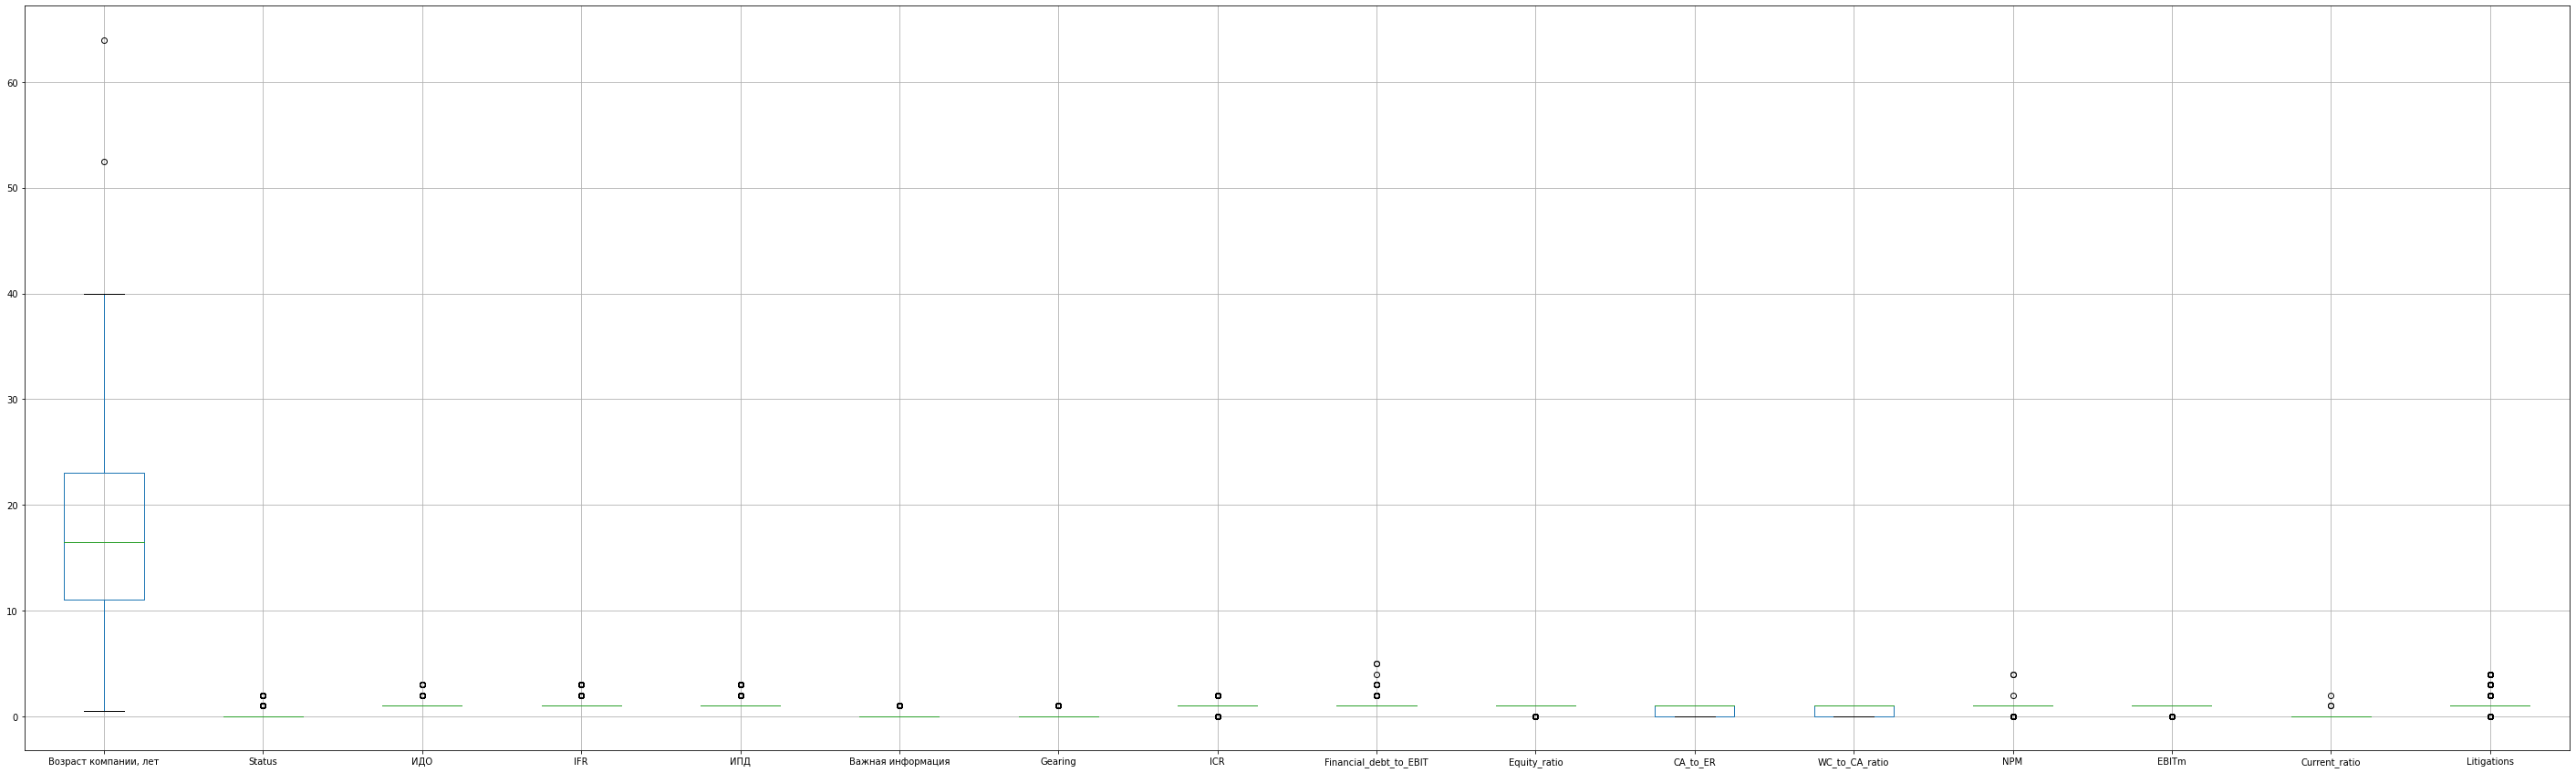

In [87]:
# Проверим наличие выбросов. В данном случае от выбросов не будем избавляться, т.к. зачастую именно выбросы помогут разделить компании на 3 класса (т.е. это не ошибки, а естественные выбросы).
clean_df.boxplot(figsize=(50,15))

**4. Подготовка к обучению**

In [88]:
clean_df.columns

Index(['Возраст компании, лет', 'Status', 'ИДО', 'IFR', 'ИПД',
       'Важная информация', 'Gearing', 'ICR', 'Financial_debt_to_EBIT',
       'Equity_ratio', 'CA_to_ER', 'WC_to_CA_ratio', 'NPM', 'EBITm',
       'Current_ratio', 'Litigations'],
      dtype='object')

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = ['Возраст компании, лет', 'Status', 'ИДО', 'ИПД',
       'Важная информация', 'Gearing', 'ICR', 'Financial_debt_to_EBIT',
       'Equity_ratio', 'CA_to_ER', 'NPM', 'EBITm', 'Current_ratio',
       'Litigations']
X = clean_df[cols]
y = clean_df['IFR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

Optimal number of features: 13
Selected features: ['Возраст компании, лет', 'Status', 'ИПД', 'Важная информация', 'Gearing', 'ICR', 'Financial_debt_to_EBIT', 'Equity_ratio', 'CA_to_ER', 'NPM', 'EBITm', 'Current_ratio', 'Litigations']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


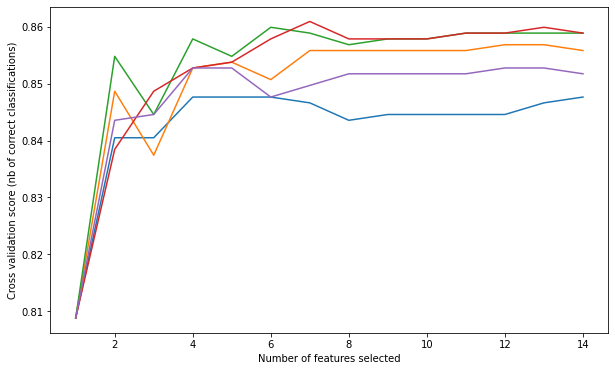

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

selected_features = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

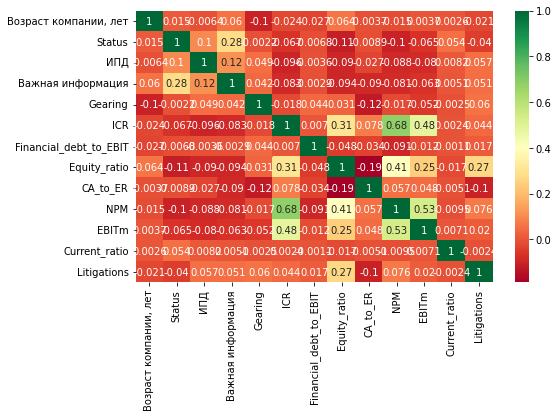

In [91]:
X = clean_df[selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

**5. Обучение (логистическая регрессия)**

In [92]:
from sklearn.metrics import classification_report 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='neg_log_loss')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.852
LogisticRegression average log_loss is 0.373


In [94]:
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [95]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         1.0      0.889     0.968     0.927      1696
         2.0      0.631     0.395     0.486       342
         3.0      0.763     0.492     0.598        59

    accuracy                          0.861      2097
   macro avg      0.761     0.618     0.670      2097
weighted avg      0.844     0.861     0.846      2097



**6. Выводы**
- F1-score (macro) достигает максимально 67-70%, но F1-score (weighted avg) стабильно >80% (данные несбалансированы по отклику).
- Accuracy >85%.
- В целом, модель можно попробовать улучшить за счет добавления новых данных (с целью более широкой представленности экземпляров классов 2 и 3). Однако, поскольку охват текущей модели достаточно широкий (компании с выручкой от 400 млн руб до 100 млрд руб), новые данные будут, вероятно, содержать компании малого бизнеса, которые заметно отличаются от компаний среднего/крупного/крупнейшего бизнеса. Таким образом, это может и негативно сказаться на модели.
- Другой возможный способ улучшения модели - генерация новых признаков (например, динамики изменения отдельных статей бух. баланса на 31.12.21 г и отчета о финансовых результатах г за 2021 г по сравнению с 2020 г), добавление качественных показателей.